HOUSING PRICE PREDICTION ML MODEL

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("C:/Users/ASUS/OneDrive - Manipal Education (MENA) FZ LLC/Desktop/housing.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.dropna(inplace=True)

In [6]:
from sklearn.model_selection import train_test_split

X= data.drop(['median_house_value'], axis=1)
y=data['median_house_value']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

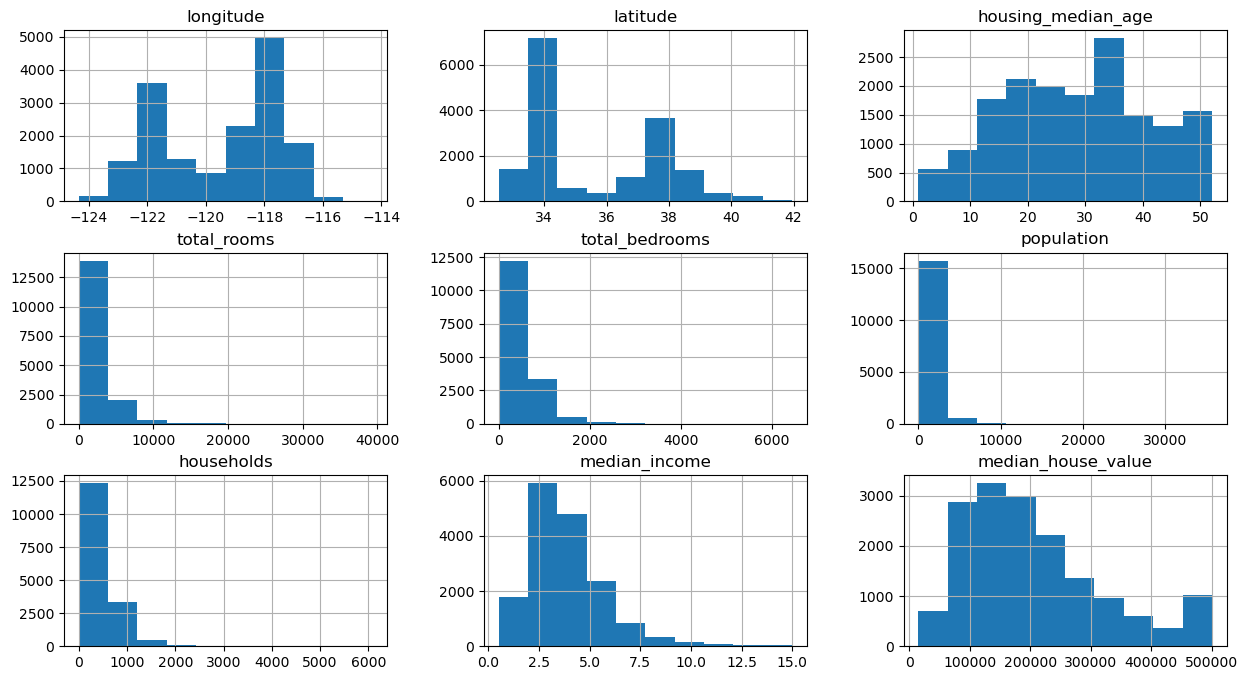

In [7]:
train_data = X_train.join(y_train)
train_data
train_data.hist(figsize=(15,8))

<Axes: >

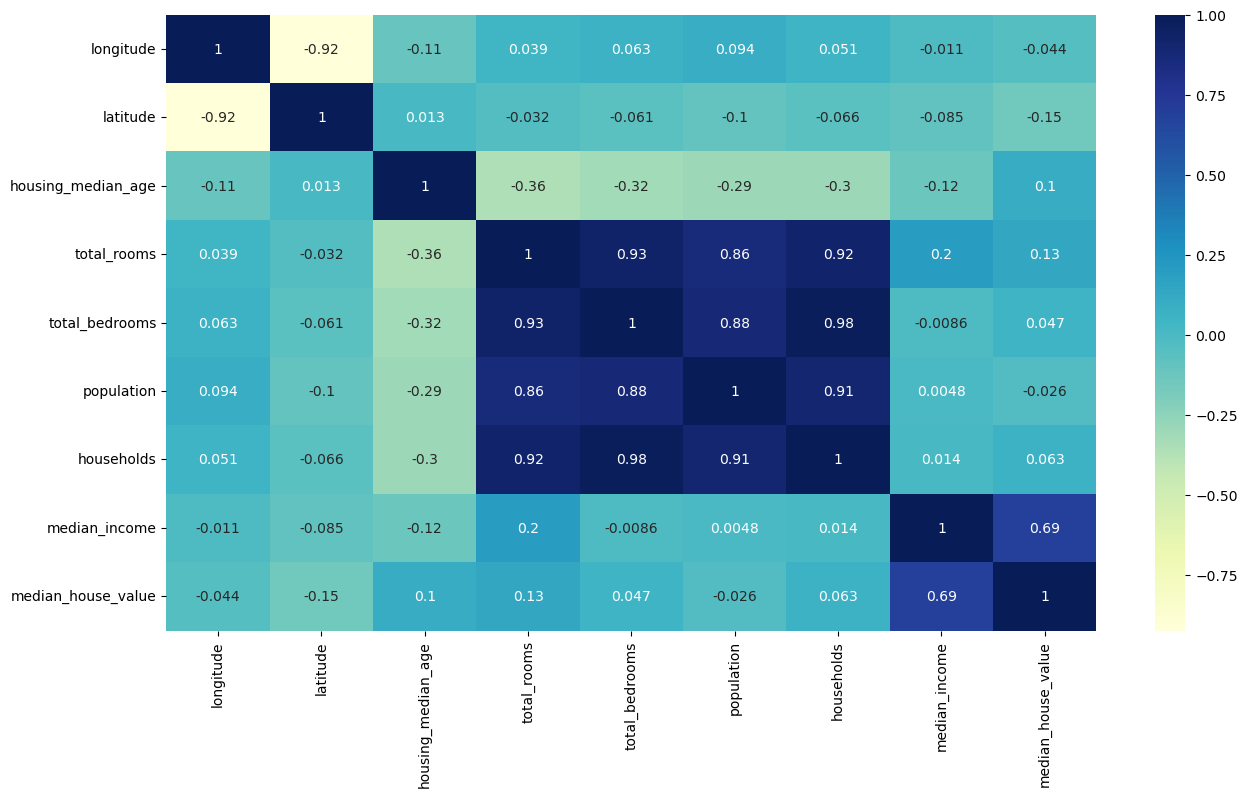

In [8]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True,cmap="YlGnBu")

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

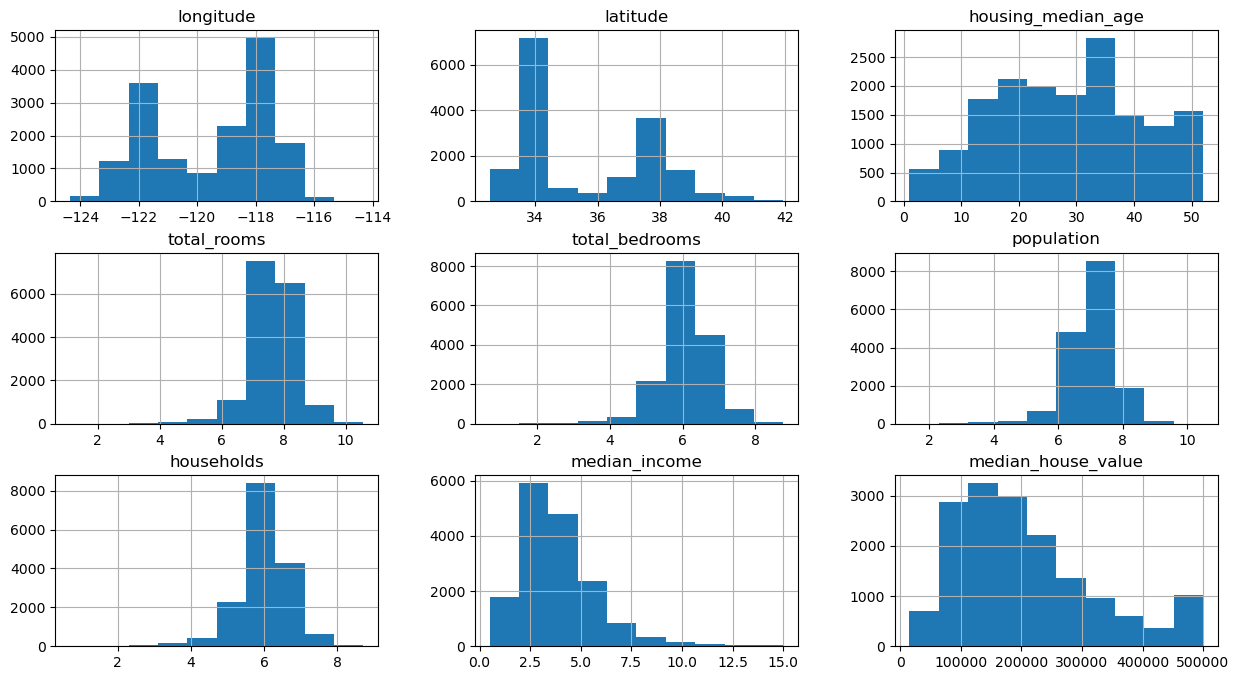

In [9]:
train_data['total_rooms']=np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['population']=np.log(train_data['population']+1)
train_data['households']=np.log(train_data['households']+1)

train_data.hist(figsize=(15,8))

In [14]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity,dtype=int)).drop(['ocean_proximity'],axis=1)

In [15]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
9973,-122.40,38.53,24.0,7.462789,5.669881,6.336826,5.446737,3.6118,248400.0,0,1,0,0,0
48,-122.26,37.82,40.0,6.437752,5.278115,6.049733,5.081404,0.9506,187500.0,0,0,0,1,0
13253,-117.68,34.11,16.0,8.068090,6.156979,7.254885,6.142037,5.5292,208600.0,0,1,0,0,0
986,-121.85,37.72,43.0,5.433722,3.713572,4.430817,3.761200,10.3203,400000.0,0,1,0,0,0
3226,-119.65,36.32,11.0,7.166266,5.752573,6.570883,5.673323,1.5433,50400.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18527,-122.04,36.97,49.0,6.675823,4.919981,5.805135,4.927254,5.2128,238600.0,0,0,0,0,1
9433,-122.80,38.18,36.0,7.774436,6.167516,6.864848,5.894403,3.6250,253100.0,0,0,0,0,1
1458,-121.98,37.97,26.0,7.906547,5.968708,7.117206,6.016157,5.9617,231100.0,0,1,0,0,0
20034,-119.02,36.07,39.0,7.068172,5.598422,6.555357,5.451038,1.6146,53100.0,0,1,0,0,0


<Axes: >

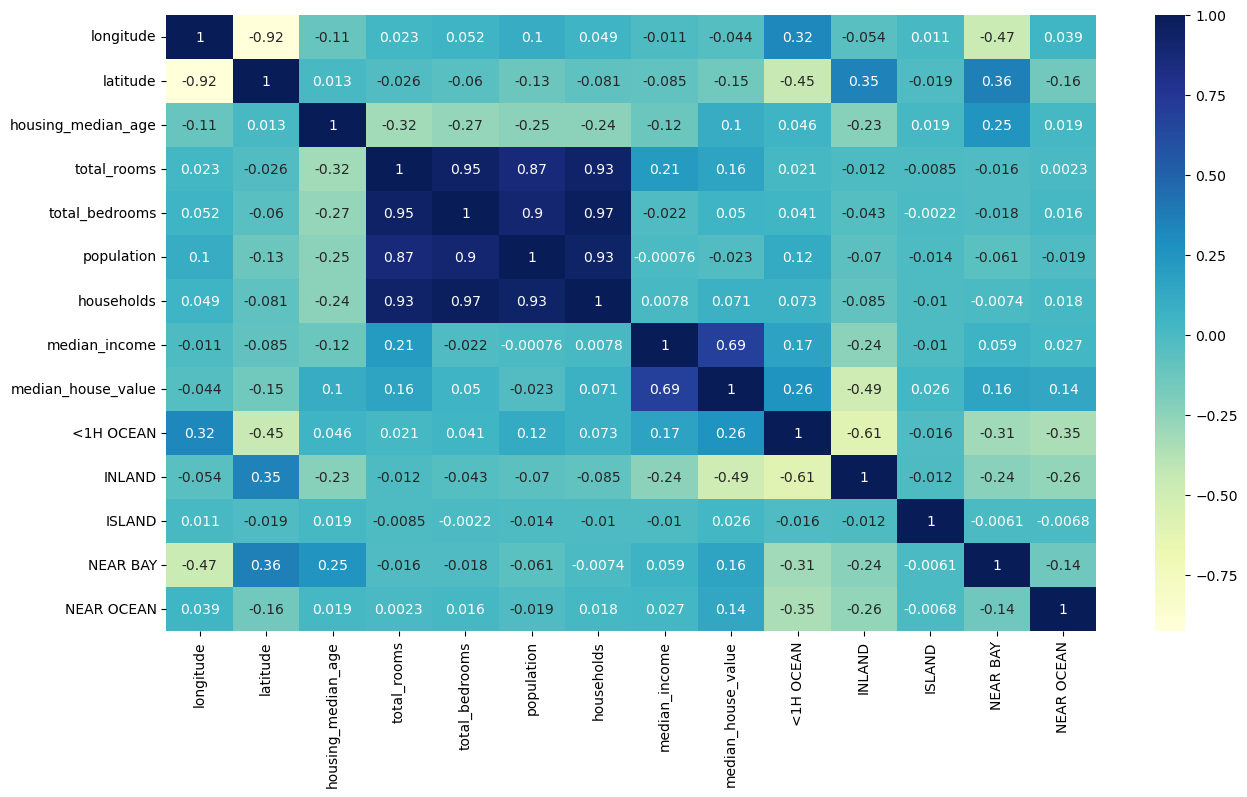

In [16]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True,cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

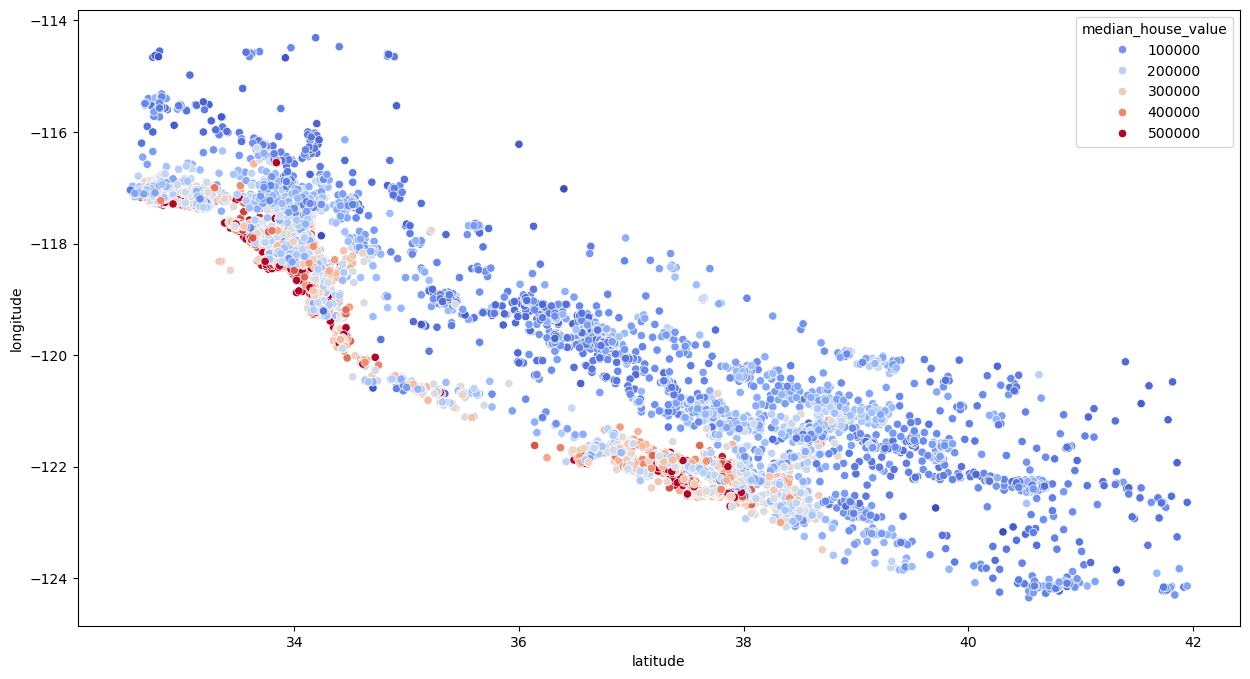

In [ ]:
#THE BELOW SCATTERPLOT SHOWS US PRICE OF THE HOUSE WHEN IT GETS CLOSER TO THE BEACH
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude",data=train_data,hue="median_house_value",palette="coolwarm")

In [19]:
#FEATURES
train_data['bedroom_ratio']=train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms']=train_data['total_rooms'] / train_data['households']


<Axes: >

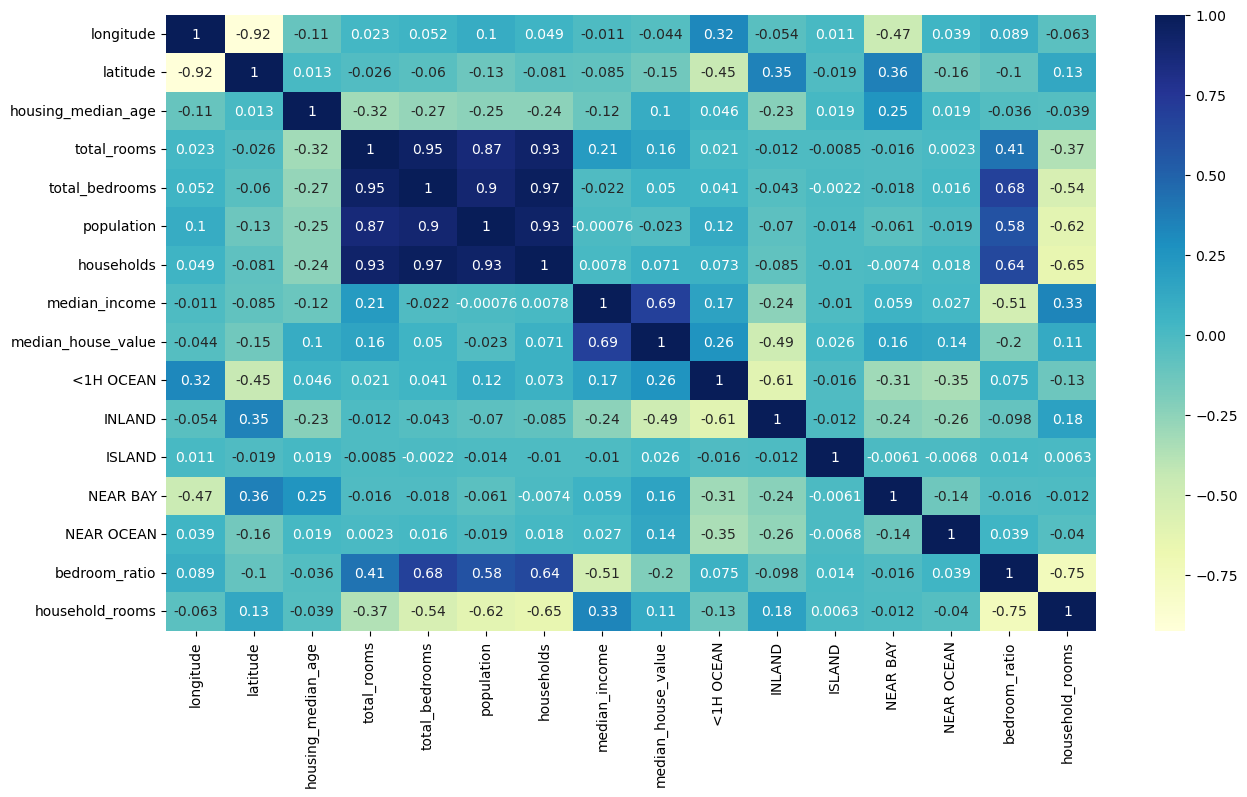

In [20]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True,cmap="YlGnBu")

SIMPLE LINEAR REGRESSION MODEL

In [21]:
from sklearn.linear_model import LinearRegression

X_train,y_train = train_data.drop(['median_house_value'],axis=1),train_data['median_house_value']

reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
test_data = X_train.join(y_train)

test_data['total_rooms']=np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']=np.log(test_data['total_bedrooms']+1)
test_data['population']=np.log(test_data['population']+1)
test_data['households']=np.log(test_data['households']+1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity,dtype=int)).drop(['ocean_proximity'],axis=1)

test_data['bedroom_ratio']=test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms']=test_data['total_rooms'] / test_data['households']

